<a href="https://colab.research.google.com/github/rb2022/ET5003_SEM1_2021-2/blob/main/ET5003_Kaggle_RobertBarrett_20157347%20(12).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div>
<img src="https://drive.google.com/uc?export=view&id=1vK33e_EqaHgBHcbRV_m38hx6IkG0blK_" width="350"/>
</div> 

#**Artificial Intelligence - MSc**
##ET5003 - MACHINE LEARNING APPLICATIONS 

###Instructor: Enrique Naredo
###ET5003_KaggleCompetition

In [ ]:
#@title Current Date
Today = '2021-10-06' #@param {type:"date"}


In [ ]:
#@markdown ---
#@markdown ### Enter your details here:
Team_Number = "5" #@param {type:"string"}
Student_ID&Name = "" #@param {type:"string"}
Student_ID&Name = "" #@param {type:"string"}
Student_ID&Name = "" #@param {type:"string"}
Student_ID&Name = "" #@param {type:"string"}
Student_ID&Name = "" #@param {type:"string"}
#@markdown ---

SyntaxError: ignored

In [ ]:
#@title Notebook information
Notebook_type = 'Etivity' #@param ["Example", "Lab", "Practice", "Etivity", "Assignment", "Exam"]
Version = Final #@param ["Draft", "Final"] {type:"raw"}
Submission = False #@param {type:"boolean"}

NameError: ignored

# INTRODUCTION

Your introduction here.

***The goal is to use advanced Machine Learning methods to predict House price.***

## Imports

In [7]:
# Suppressing Warnings:
import warnings
warnings.filterwarnings("ignore")

In [8]:
# standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
# to plot
import matplotlib.colors
from mpl_toolkits.mplot3d import Axes3D

# to generate classification, regression and clustering datasets
import sklearn.datasets as dt

# to create data frames
from pandas import DataFrame

# to generate data from an existing dataset
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

In [10]:
# Scikit-learn is an open source machine learning library 
# that supports supervised and unsupervised learning
# https://scikit-learn.org/stable/
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix

In [11]:
# Regular expression operations
#https://docs.python.org/3/library/re.html
import re 

# Natural Language Toolkit
# https://www.nltk.org/install.html
import nltk

# Stemming maps different forms of the same word to a common “stem” 
# https://pypi.org/project/snowballstemmer/
from nltk.stem import SnowballStemmer

# https://www.nltk.org/book/ch02.html
from nltk.corpus import stopwords

# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

In [12]:
!pip install gpy

     |████████████████████████████████| 959 kB 5.2 MB/s 
     |████████████████████████████████| 71 kB 5.4 MB/s 
  Created wheel for gpy: filename=GPy-1.10.0-cp37-cp37m-linux_x86_64.whl size=2565096 sha256=37ed387b3d8a0399e4d6a92c0ba02a82e5b7c086573840d815a260634195fe47
  Stored in directory: /root/.cache/pip/wheels/f7/18/28/dd1ce0192a81b71a3b086fd952511d088b21e8359ea496860a
  Created wheel for paramz: filename=paramz-0.9.5-py3-none-any.whl size=102565 sha256=c1880d0cc8947b715906c0181b52e94f6e2779a976c7cdfa606264c4e80fd1da
  Stored in directory: /root/.cache/pip/wheels/c8/95/f5/ce28482da28162e6028c4b3a32c41d147395825b3cd62bc810
Successfully built gpy paramz


In [13]:
import GPy as GPy
import numpy as np
import pylab as pb
import pymc3 as pm
import arviz as az

In [14]:
# Define the seed so that results can be reproduced
seed = 11
rand_state = 11

# Define the color maps for plots
color_map = plt.cm.get_cmap('RdYlBu')
color_map_discrete = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","cyan","magenta","blue"])

# DATASET

Extract from this [paper](https://ieeexplore.ieee.org/document/9300074):

* House prices are a significant impression of the economy, and its value ranges are of great concerns for the clients and property dealers. 

* Housing price escalate every year that eventually reinforced the need of strategy or technique that could predict house prices in future. 

* There are certain factors that influence house prices including physical conditions, locations, number of bedrooms and others.


1. [Download the dataset](https://github.com/UL-CS6134/CS6134_SEM1_2021-2/tree/main/Week-5). 

2. Upload the dataset into your folder.



In [15]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
path = '/content/sample_data/'

# Due to formatting issues, I found that explicitly defining features of interest and omitting ones that are problematic was useful

train_file = path+'HousePrice_Train.csv'
test_file = path+'HousePrice_Test.csv'

# Import the data, while excluding 'features' and 'description_block' explicitly on import
train_data = pd.read_csv(train_file)
test_data = pd.read_csv(test_file)

In [17]:
print(train_data.shape)
print(test_data.shape)

(1638, 14)
(702, 13)


The challenge is to predict the final price of each house.

## Exploratory Data Analysis

#### Let's look at samples of the tabular data and review some basic statistics

In [ ]:
# Review samples of training data

train_data.head()

,Index,ID,Location,Num_Bathrooms,Num_Beds,BER_class,Description,Services,Features,Latitude,Longitude,Type,Surface,Price
0,1,12409116,Ongar,2,2,C3,DNG are delighted to present to the market no....,NaN,None,53.396659,-6.438791,apartment,67.00,195000
1,2,12320330,North Strand,1,2,D1,13 Northbrook Terrace is a charming red brick ...,NaN,Bight and Spacious interior\nNumerous original...,53.357129,-6.239779,terraced,95.97,425000
2,3,12405953,Stepaside,3,3,A3,"Welcome to No. 6 Cotter Close, an immaculately...",NaN,Special Features\nLarge rear garden\nGenerous ...,53.266468,-6.222771,semi-detached,107.00,535000
3,4,12202582,Cabinteely,1,3,E1,Welcome to 3 Sycamore Walk!\n\r\nEnjoying a pr...,NaN,Wonderful 3 bed detached bungalow. \nAccom...,53.261600,-6.166738,detached,81.00,499000
4,5,12299336,Lusk,3,4,D1,'Four Seasons' comes to the market as a wonder...,NaN,Detached Property \nDouble Glazed Windows...,53.550731,-6.121415,detached,153.00,510000


In [ ]:
# Review samples of test data

test_data.head()

,Index,ID,Location,Num_Bathrooms,Num_Beds,BER_class,Description,Services,Features,Latitude,Longitude,Type,Surface
0,1639,12292473,Milltown,2,2,C2,OMD Estate Agents are delighted to present thi...,"Parking,Oil Fired Central Heating",Designated parking spaces\nPresented in pristi...,53.316269,-6.243391,townhouse,65.0
1,1640,12314667,Glasnevin,2,5,E1,Welcome to Saint Anthony No.214 Glasnevin Aven...,"Parking,Gas Fired Central Heating",Modern Worcester Gas Boiler\nSingle Glazed Win...,53.390769,-6.281936,semi-detached,142.0
2,1641,11699240,Dalkey,1,2,G,"Located in this ever popular road, on grounds ...",NaN,2 BEDROOM DETACHED HOUSE ON 1/5th ACRE\nOIL F...,53.272486,-6.108675,detached,80.0
3,1642,12416984,Raheny,4,4,A2,DNG are delighted to represent the sale of thi...,"Parking,Alarm",Detached House\nSouth Facing Garden\nOff Stree...,53.376932,-6.185334,detached,209.0
4,1643,12383407,Crumlin,2,3,F,A unique opportunity to acquire this red brick...,"Parking,Gas Fired Central Heating,Alarm",Red brick end of terrace property \nC. 108sqm ...,53.327208,-6.308938,end-of-terrace,108.0


In [ ]:
# Generate statistcis for numeric training data

train_data.describe()

,Index,ID,Num_Bathrooms,Num_Beds,Latitude,Longitude,Surface,Price
count,1638.000000,1.638000e+03,1638.000000,1638.000000,1638.000000,1638.000000,1638.000000,1.638000e+03
mean,819.500000,1.231930e+07,2.054335,3.043346,53.350473,-6.255086,169.540695,5.547196e+05
std,472.994186,1.447540e+05,1.241259,1.379650,0.076832,0.144430,1791.793934,5.652032e+05
min,1.000000,1.118567e+07,1.000000,1.000000,52.501856,-6.497000,3.400000,1.999500e+04
25%,410.250000,1.228104e+07,1.000000,2.000000,53.294261,-6.309613,73.000000,2.950000e+05
50%,819.500000,1.238055e+07,2.000000,3.000000,53.341386,-6.247780,97.050000,3.950000e+05
75%,1228.750000,1.240548e+07,3.000000,4.000000,53.382031,-6.193982,135.000000,5.950000e+05
max,1638.000000,1.242836e+07,18.000000,27.000000,53.630588,-1.744995,72236.387140,8.900000e+06


#### Initial Analysis of Training Data Statistics
The above table provides a some key information:

1. **counts** indicate no missing values for these numeric features

2. **mean** and **50% Quartile** are the same or close except for "Surface" and "Price" showing an imbalance in the data .. we may need to deal with this.

3. **min** and **max** indicate ranges that need to be scaled

In [ ]:
# Check for missing values in Training data 
train_missing = train_data.isnull().sum()*100/len(train_data)
print(train_missing)

Index             0.000000
ID                0.000000
Location          0.000000
Num_Bathrooms     0.000000
Num_Beds          0.000000
BER_class        15.323565
Description       0.000000
Services         64.774115
Features          0.000000
Latitude          0.000000
Longitude         0.000000
Type              0.000000
Surface           0.000000
Price             0.000000
dtype: float64


**Comments** There are two features have missing values. These are categorical features as they did not appear in above statistics report. High % missing features cannot be remediated and should be removed. We should look at 'BER_class' and see if it is an important feature. If it is, then we should look to see if there is a way to handle the missing values. 

Approach here will be to 

1. Remove 'ID' as it provides no information

2. Remove the feature 'Services'

3. Determine importance of 'BER_class' as a predictor of price. We will use XGBoost and its correspondng "feature_importance" metric.

Reviewing the features for non-uniqueness, there are no features with just one value.

In [ ]:
# Let's look at obvious erroneous values - no zero values in the training data

train_data_zeros = (train_data == 0).all()
print(train_data_zeros)

Index            False
ID               False
Location         False
Num_Bathrooms    False
Num_Beds         False
BER_class        False
Description      False
Services         False
Features         False
Latitude         False
Longitude        False
Type             False
Surface          False
Price            False
dtype: bool


There are no features with zeros so we do not have to analyse this further.

In [ ]:
# Let's look for obvious coordinates outside Dublin range

outliers = train_data[(train_data.Longitude > -6) | (train_data.Latitude < 53)]

outliers.head()

,Index,ID,Location,Num_Bathrooms,Num_Beds,BER_class,Description,Services,Features,Latitude,Longitude,Type,Surface,Price
355,356,12270559,Clondalkin,1,3,NaN,RAY COOKE AUCTIONEERS take great pleasure in i...,NaN,None,52.501856,-1.744995,semi-detached,79.0,199000


This location has coordinates for a UK address and should be removed.

In [18]:
# Remove location in UK
df_train = train_data.drop(train_data[(train_data.Longitude > -6) | (train_data.Latitude < 53)].index)

In [19]:
# Drop unimportant features

df_train.drop(['ID', 'Services'], axis=1, inplace=True)

In [20]:
# Let's deal with categorical data

# Feature map 'locations'
locations = np.hstack((train_data['Location'], test_data['Location']))
unique_loc = np.unique(locations)
unique_loc_index=[]

# Create a dictionary lookup
i = [i+1 for i in range(len(unique_loc))]
unique_areas_index = dict(zip(unique_loc, i))

# Replace area name with the index from the 'unique_areas_index' dictionary 
df_train_1 = df_train.replace({'Location': unique_areas_index})

# Feature map 'BER_class'
ber_stack = np.hstack((train_data['BER_class'], test_data['BER_class'])) # get all BER Classes from Train and Test datasets to ensure we have all classes in each set.
ber_class = [c for c in ber_stack if not(pd.isna(c)) == True] # remove NaN from feature map list
unique_ber = np.unique(ber_class)
unique_ber_index=[]

# Create a dictionary lookup
i = [i+1 for i in range(len(unique_ber))]
unique_ber_index = dict(zip(unique_ber, i))

# Replace BER_class with the index from the 'unique_ber_index' dictionary 
df_train_2 = df_train_1.replace({'BER_class': unique_ber_index})

# One-hot Encode 'Type'
df_train_2 = pd.get_dummies(df_train_2, columns=['Type'])

df_train = df_train_2.copy()

# Take a copy of the Location and BER_class column before scaling - this will be used during imputing for NaNs later
loc_ber_train_values = df_train[['Location', 'BER_class']].copy()


We will now look at the feature distributions and outliers.

In [ ]:
df_train.columns

Index(['Index', 'Location', 'Num_Bathrooms', 'Num_Beds', 'BER_class',
       'Description', 'Features', 'Latitude', 'Longitude', 'Surface', 'Price',
       'Type_apartment', 'Type_bungalow', 'Type_detached', 'Type_duplex',
       'Type_end-of-terrace', 'Type_semi-detached', 'Type_site', 'Type_studio',
       'Type_terraced', 'Type_townhouse'],
      dtype='object')

We will look at these key features:

'Location', 'Num_Bathrooms', 'Num_Beds', 'BER_class', 'Latitude', 'Longitude', 'Surface', 'Price'

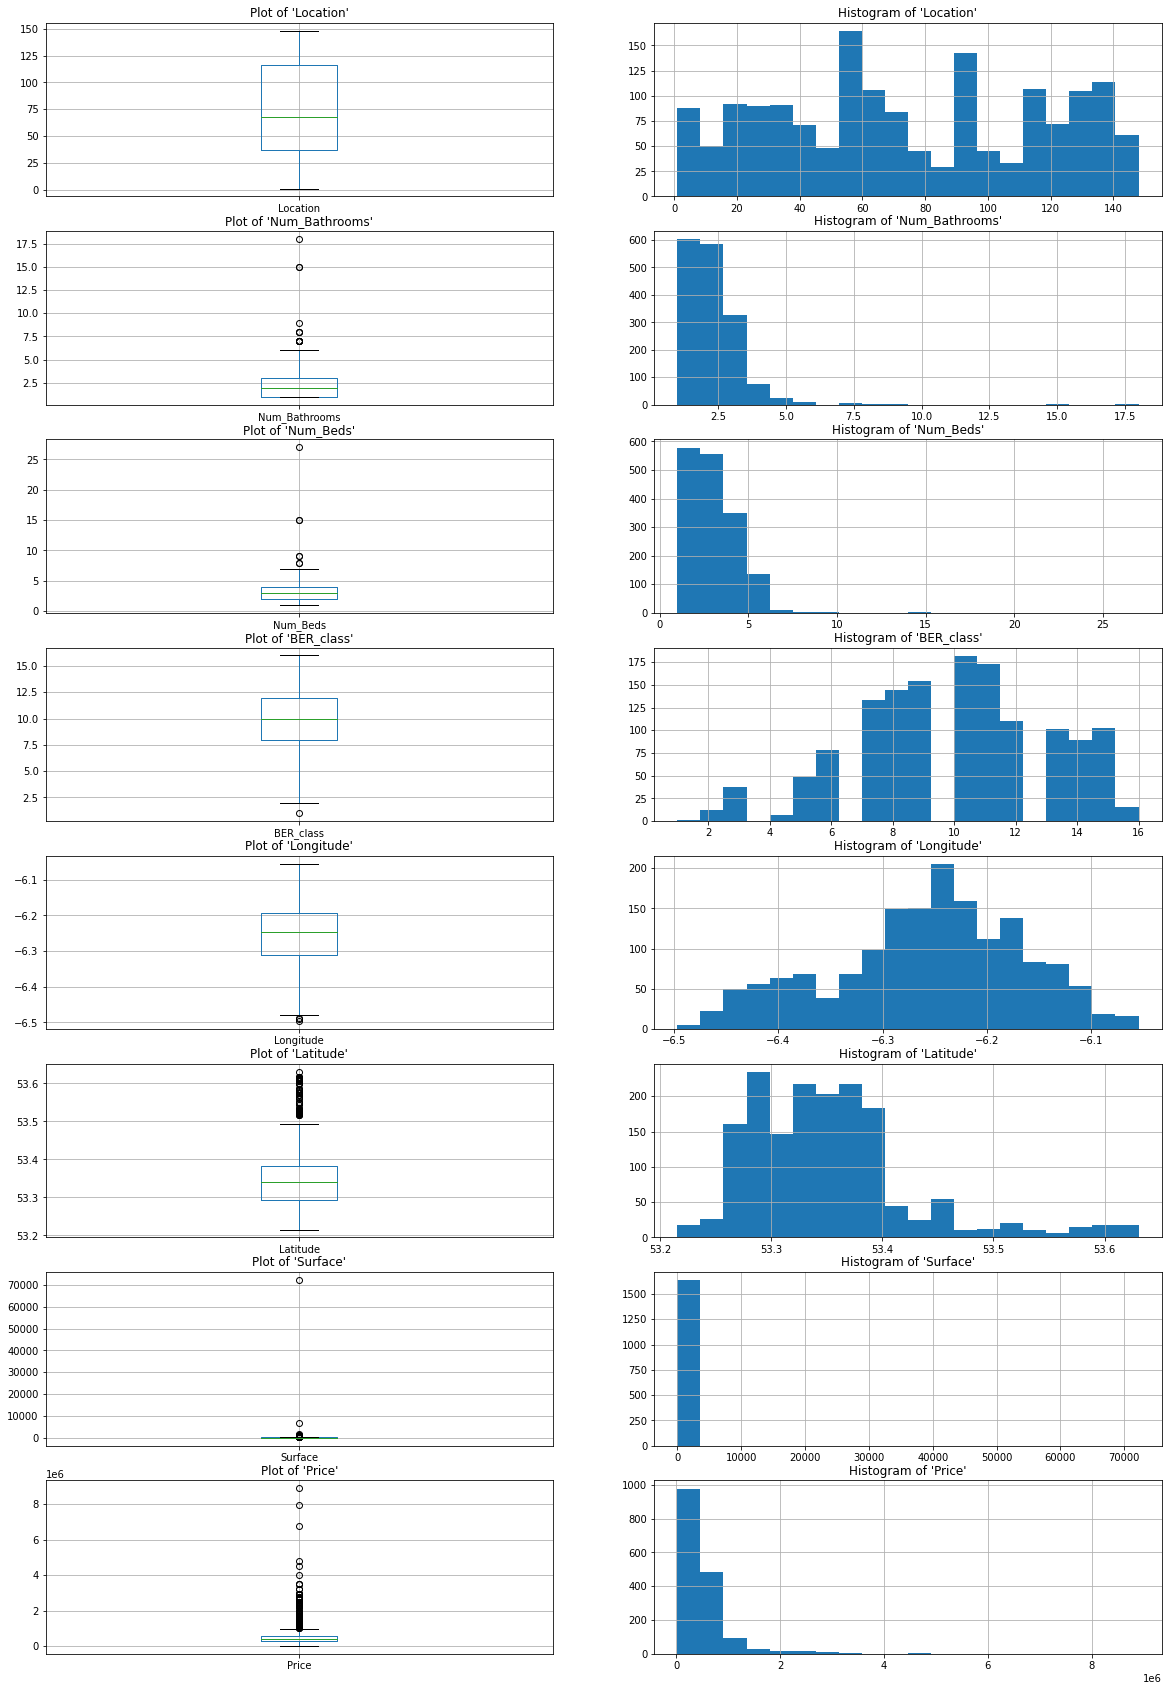

In [ ]:
# First we will look at the distribution of key predictor features

fig = plt.figure(figsize=(20,30))

ax1 = fig.add_subplot(8, 2, 1)
ax1.set_title("Plot of 'Location'")
df_train.boxplot(column=['Location'])

ax2 = fig.add_subplot(8, 2, 2)
ax2.set_title("Histogram of 'Location'")
df_train['Location'].hist(bins=20)

ax3 = fig.add_subplot(8, 2, 3)
ax3.set_title("Plot of 'Num_Bathrooms'")
df_train.boxplot(column=['Num_Bathrooms'])

ax4 = fig.add_subplot(8, 2, 4)
ax4.set_title("Histogram of 'Num_Bathrooms'")
df_train['Num_Bathrooms'].hist(bins=20)

ax5 = fig.add_subplot(8, 2, 5)
ax5.set_title("Plot of 'Num_Beds'")
df_train.boxplot(column=['Num_Beds'])

ax6 = fig.add_subplot(8, 2, 6)
ax6.set_title("Histogram of 'Num_Beds'")
df_train['Num_Beds'].hist(bins=20)

ax7 = fig.add_subplot(8, 2, 7)
ax7.set_title("Plot of 'BER_class'")
df_train.boxplot(column=['BER_class'])

ax8 = fig.add_subplot(8, 2, 8)
ax8.set_title("Histogram of 'BER_class'")
df_train['BER_class'].hist(bins=20)

ax9 = fig.add_subplot(8, 2, 9)
ax9.set_title("Plot of 'Longitude'")
df_train.boxplot(column=['Longitude'])

ax10 = fig.add_subplot(8, 2, 10)
ax10.set_title("Histogram of 'Longitude'")
df_train['Longitude'].hist(bins=20)

ax11 = fig.add_subplot(8, 2, 11)
ax11.set_title("Plot of 'Latitude'")
df_train.boxplot(column=['Latitude'])

ax12 = fig.add_subplot(8, 2, 12)
ax12.set_title("Histogram of 'Latitude'")
df_train['Latitude'].hist(bins=20)

ax13 = fig.add_subplot(8, 2, 13)
ax13.set_title("Plot of 'Surface'")
df_train.boxplot(column=['Surface'])

ax14 = fig.add_subplot(8, 2, 14)
ax14.set_title("Histogram of 'Surface'")
df_train['Surface'].hist(bins=20)

ax15 = fig.add_subplot(8, 2, 15)
ax15.set_title("Plot of 'Price'")
df_train.boxplot(column=['Price'])

ax16 = fig.add_subplot(8, 2, 16)
ax16.set_title("Histogram of 'Price'")
df_train['Price'].hist(bins=20)

There is an outlier on 'Surface' that needs to be investigated

In [ ]:
df_train[(df_train.Surface > 2000)]

,Index,Location,Num_Bathrooms,Num_Beds,BER_class,Description,Features,Latitude,Longitude,Surface,Price,Type_apartment,Type_bungalow,Type_detached,Type_duplex,Type_end-of-terrace,Type_semi-detached,Type_site,Type_studio,Type_terraced,Type_townhouse
506,507,138,1,4,12.0,Thornton Park is a superb modern equestrian ce...,None,53.474502,-6.343483,72236.38714,1100000,0,1,0,0,0,0,0,0,0,0
1115,1116,19,1,2,13.0,Baxter Real Estate are delighted to present to...,Short drive to the N3 and M50 .\nSuitable for ...,53.386540,-6.377356,6705.00000,425000,0,1,0,0,0,0,0,0,0,0


There is only two values in the range greater than 2,000. Decision to remove it seems valid.

In [21]:
df_train = df_train.drop(df_train[df_train.Surface > 2000].index)

In [22]:
# Apply scalers to data to resolve distribution and outlier issues
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()
standardscaler = StandardScaler()

# Not a normal distribution so just scale with MinMax [0, 1]
df_train[['Location']] = minmax.fit_transform(df_train[['Location']])

# Deal with outliers with a Log Transform - later we will use Standard Scaler as well on some feature
df_train['Num_Bathrooms'] = np.log(df_train['Num_Bathrooms'])

df_train['Num_Beds'] = np.log(df_train['Num_Beds'])

df_train['Latitude'] = np.log(df_train['Latitude'])

df_train['Surface'] = np.log(df_train['Surface'])

df_train['Price'] = np.log(df_train['Price'])

# Standard scaler for normal distributions
df_train[['BER_class', 'Longitude', 'Latitude', 'Surface', 'Price']] = standardscaler.fit_transform(df_train[['BER_class', 'Longitude', 'Latitude', 'Surface', 'Price']])


Do the same scaling to the Test Data

In [ ]:
# Check for missing values in Training data - calculate % misisng values
test_missing = test_data.isnull().sum()*100/len(test_data)
print(test_missing)

Index             0.000000
ID                0.000000
Location          0.000000
Num_Bathrooms     0.000000
Num_Beds          0.000000
BER_class        15.384615
Description       0.000000
Services         64.957265
Features          0.000000
Latitude          0.000000
Longitude         0.000000
Type              0.000000
Surface           0.000000
dtype: float64


In [23]:
# Drop unimportant features

test_data.drop(['ID', 'Services'], axis=1, inplace=True)


In [24]:
df_test = test_data.copy()

In [25]:
# Let's deal with categorical data for Test Dataset

# Replace area name with the index from the 'unique_areas_index' dictionary 
df_test_1 = df_test.replace({'Location': unique_areas_index})

# Replace BER_class with the index from the 'unique_ber_index' dictionary 
df_test_2 = df_test_1.replace({'BER_class': unique_ber_index})

# One-hot Encode 'Type'
df_test_2 = pd.get_dummies(df_test_2, columns=['Type'])

df_test = df_test_2.copy()

# Take a copy of the Location and BER_class column before scaling - this will be used during imputing for NaNs later
loc_ber_test_values = df_test[['Location', 'BER_class']].copy()

# Apply same scalers as for Training dataset
df_test[['Location']] = minmax.fit_transform(df_test[['Location']])

df_test['Num_Bathrooms'] = np.log(df_test['Num_Bathrooms'])

df_test['Num_Beds'] = np.log(df_test['Num_Beds'])

df_test['Latitude'] = np.log(df_test['Latitude'])

df_test['Surface'] = np.log(df_test['Surface'])

# Standard scaler for normal distributions
df_test[['BER_class', 'Longitude', 'Latitude', 'Surface']] = standardscaler.fit_transform(df_test[['BER_class', 'Longitude', 'Latitude', 'Surface']])


Now let's look at 'BER_class' and see how important it is for predicting price.
The following approach uses XGBoost Regression algorithm which has some powerful built in functions for Feature Importance.

In [26]:
# Let's take a closer look at 'BER_class' using feature importance on all data set
# We will look at the feature Importance of 'BER_class' with empty features removed from the dataset 
# and left in to see check the impact also for imputation.

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

def xgb_model(X, y, msg):

  xgb_model = xgb.XGBRegressor(max_depth=7, learning_rate = 0.6, n_jobs=4, objective = 'reg:squarederror', random_state=10, n_estimators=50).fit(X, y)

  y_xgb_pred = xgb_model.predict(X)

  RMSE_xgb = mean_squared_error(y, y_xgb_pred, squared=False)

  r2_xgb = r2_score(y, y_xgb_pred)

  print(msg)

  print("RMSE_score: %.4f   R2_score: %.4f" %(RMSE_xgb, r2_xgb))

  return xgb_model, RMSE_xgb, r2_xgb

In [27]:
# Let's look at the Feature Importance with all BER_class values equal to NULL removed
# We will also remove large text features for now.

features = ['Location', 'Num_Bathrooms', 'Num_Beds', 'BER_class',
                        'Latitude', 'Longitude', 'Surface', 'Type_apartment', 
                        'Type_bungalow', 'Type_detached', 'Type_duplex',
                        'Type_end-of-terrace', 'Type_semi-detached', 'Type_site', 'Type_studio',
                        'Type_terraced', 'Type_townhouse', 'Price']

df_train_xgb = df_train[features]
X_train_xgb = df_train_xgb.iloc[:,0:-1].values 
y_train_xgb = df_train_xgb.iloc[:,-1].values.reshape(-1,1)  

df_train_xgb_partial = df_train_xgb.dropna(how='all', subset=['BER_class'])
X_train_xgb_partial = df_train_xgb_partial.iloc[:,0:-1].values
y_train_xgb_partial = df_train_xgb_partial.iloc[:,-1].values.reshape(-1,1) 

# Call XGBoost Model for each dataset

Model_Full, RMSE_xgb_train_full, r2_xgb_train_full = xgb_model(X_train_xgb, y_train_xgb, "Performance Evaluation for Full Training Set")

Model_Partial, RMSE_xgb_train_partial, r2_xgb_train_partial = xgb_model(X_train_xgb_partial, y_train_xgb_partial, "Performance Evaluation for NaNs Removed")



Performance Evaluation for Full Training Set
RMSE_score: 0.0332   R2_score: 0.9989
Performance Evaluation for NaNs Removed
RMSE_score: 0.0230   R2_score: 0.9994


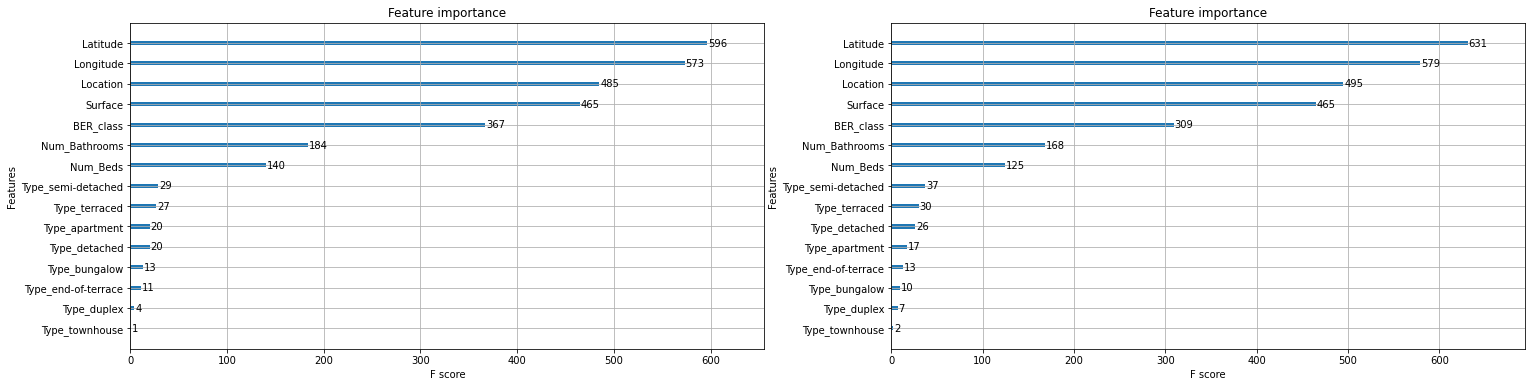

In [28]:
# Let's plot the Feature Importance for each of these solutions

import seaborn as sn

fig = plt.figure(figsize=(25,6))

Model_Full.get_booster().feature_names = features[:-1]
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Plot of Feature Importance for Full Model")
xgb.plot_importance(Model_Full, max_num_features= 17, ax=ax1, importance_type="weight")

Model_Partial.get_booster().feature_names = features[:-1]
ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title("Plot of Feature Importance for Model with NaNs removed.")
xgb.plot_importance(Model_Partial, max_num_features= 17, ax=ax2, importance_type="weight")

plt.show()


**Analysis of Plots** It can be seen from the above plots of Training Dataset with NaNs removed (plot on right) and NaNs left (plot on left) in that both plots confirm the importance of BER_class. XGBoost handles NaN values by default but we cannot expect that all models wil do so. We will keep the BER_class and compute imputed values for missing data.

Note also that both models agree on the overall importance of features. The Top 7 Features have a greater influence on model performance. It seems that property 'Type' is not so important.

For this exercise, I will concentrate on the Top 7 key features and remove the 'Type'

#### Imputing BER_class value: replace NaNs with average BER by location

In [29]:
# First we will determine the average BER_class for each Location.
# This approach was taken because many locations have a mix of BER ratings (determined from analysis)
# but are, in general, either new development areas or mature development areas and as such 
# are likely to have ratings within a range based on maturity of the location as a whole.

# Determine the average BER_class rating by location
feat = ['Location', 'BER_class']
train_feat = df_train_2[feat]
test_feat =  df_test_2[feat]
train_test_stack = pd.concat([train_feat, test_feat])

average_vals = train_test_stack.groupby(['Location'], dropna=True)['BER_class'].mean().round()


**Comment** The code above creates a lookup of Average BER_class by Location. However, this is not a perfect lookup as there are several locations in the combined Training and Test datasets that have only one property in certain locations and these properties have a NaN value for BER_class. This means that the lookup will not be able to replace these NaNs with and average. Tests have shown that the effect is limited and the BER_class is improved from 15.4% missing values to 0.1% missing values. 

In [30]:
# Look for NaNs and replace them with the average for the given location
import math

def impute_ber(data):
  for index, row in data.iterrows():
    if math.isnan(row['BER_class']): 
      loc = row['Location']
      lookup_ber = average_vals.loc[loc]
      data.loc[index, "BER_class"] = lookup_ber
  return data

In [31]:
# Impute BER_class on training data
ber_tr_values = impute_ber(loc_ber_train_values)

# Impute BER_class on test data
ber_ts_values = impute_ber(loc_ber_test_values)

# There are still a very small number (2 in both training and test datsets) of NaNs due to single properties in locations that have NaNs and therefore could not be averaged
# We will apply an average over the entire feature for BER_class to populate these
ber_tr_values['BER_class'].fillna((ber_tr_values['BER_class'].mean()), inplace=True)
ber_ts_values['BER_class'].fillna((ber_ts_values['BER_class'].mean()), inplace=True)

# We can apply the standard scaler to each of the training and test set BER_class features
ber_tr_values[['BER_class']] = standardscaler.fit_transform(ber_tr_values[['BER_class']])
ber_ts_values[['BER_class']] = standardscaler.fit_transform(ber_ts_values[['BER_class']])

# Then we insert these columns back into the df_train and df_test datasets
df_train['BER_class'] = ber_tr_values['BER_class']
df_test['BER_class'] = ber_ts_values['BER_class']

In [32]:
# Let's test for any performance changes with the XGBoost Model

# Remove 'Type' from dataset as it does not appear to be too important
features = ['Location', 'Num_Bathrooms', 'Num_Beds', 'BER_class',
                        'Latitude', 'Longitude', 'Surface','Price']

df_train_xgb = df_train[features]
X_train_xgb = df_train_xgb.iloc[:,0:-1].values 
y_train_xgb = df_train_xgb.iloc[:,-1].values.reshape(-1,1)  

# Call XGBoost Model for each dataset
Model_Full, RMSE_xgb_train_full, r2_xgb_train_full = xgb_model(X_train_xgb, y_train_xgb, "Performance Evaluation for Full Training Set")


Performance Evaluation for Full Training Set
RMSE_score: 0.0410   R2_score: 0.9983


**Comment** The performance of the XGBoost Model has not shown much improvement with the imputing of missing BER_values. However, that is expected as XGBoost handles missing values by default. We expect to see no great impact on the model, but no deterioration.

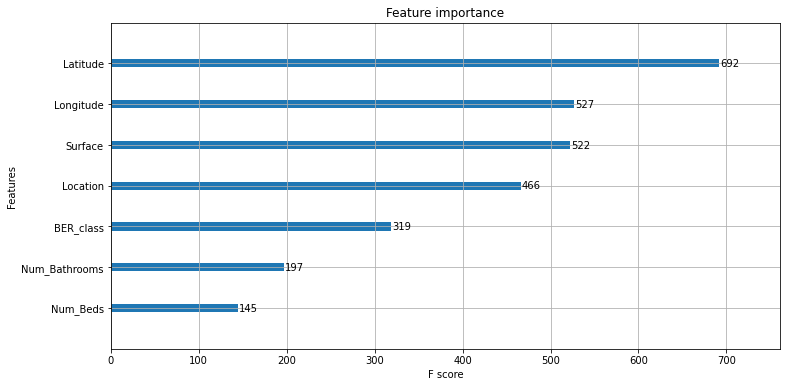

In [33]:
# Plot the Feature Importance to see what the impact of imputing BER_class has been
fig, ax = plt.subplots(figsize=(12, 6))

Model_Full.get_booster().feature_names = features[:-1]
xgb.plot_importance(Model_Full, max_num_features= 7, ax=ax, importance_type="weight")
plt.show()

**Comment** As mentioned above, we expect to see no great change from in either BER_class feature importance. Key here is the model performs well with the newly processed data and that is confirmed. We want to process the data to perform well with models that do not handle missing data well and that is what we have done here.

### Analysis of Exploratory Data Analysis and Feature Engineering/Preprocessing
**Explain the approach, setps and results**

**Discuss the imputing for BER_class**
>>1) Not much impact and 

>>2) not expected with XGBoost but will be important for modelling with algorithms that do not handle NaNs as well as XGBoost>

**Discuss the Type feature(s)** and the fact they do not look useful and may be removed from further processing


**The data is fully processed and ready for next stage - NLP Processing**

The training and test datasets have been fully processed by removing unnecessary columns removing erroneous records, scaling and imputing values to provide complete datasets ready for further processing.

**Comment** key to note here is the scales on all features are within similar ranges and not with large differences.

# NATURAL LANGUAGE PROCESSING

Natural language processing ([NLP](https://en.wikipedia.org/wiki/Natural_language_processing)) is a subfield of linguistics, computer science, and artificial intelligence.

* NLP concerned with the interactions between computers and human language.
* In particular how to program computers to process and analyze large amounts of natural language data. 
* The goal is a computer capable of "understanding" the contents of documents.
* Including the contextual nuances of the language within them. 
* The technology can then accurately extract information and insights contained in the documents.
* As well as categorize and organize the documents themselves. 

For this section, we will process the two textual features using NLP techniqus. The two textual features are:

1. Description

2. Features

We are looking to see if these features have an impact on price. There maybe some words or phrases (bi- or tri-grams) that may influence the Price paid for the propertes. This is interesting because these are typically used by sellers or estate agents to dscribe the prperty for sale. The use of descriptions like this, as well as more detail on features of the prperty, are likely to influence buyers, so we will test this.

### Approach to using NLP to increase the performance of the datasets
There are many options available to using NLP to process text data. For the current exercise, I will look at using NLP to provide additional features that may enhance the results and increase performance of the prediction models.

The approach will take the follow steps
1. Process 'Description' and 'Features' features to extract relevant words or phrases (n-grams). **Note**: It has been observed that these features, especially 'Description' can have similar text content. An initial review has also found descriptions of property features in the 'Description' field and "None" in the 'Features' field. This will be mitigated by combining these textual fields for processing.

2. Combine 'Description' and 'Features' fields and process by removing extraneous content such as numbers, punctuation, stopwords, etc and then Stemming, Lemmatizing, etc. to produce clean textual content.

3. Apply TF-IDF to extract the most important words and phrases across the textual corpus.

4. Order and select the top X number of words and phrases and create new features from them on the datasets, i.e. 'has_Parking', 'has_Garden', 'local_Amenities', etc.

5. Process each property record in both Training and Test datasets to update these features with [0, 1] if any of the words or phrases are present in the text of the record/sample.

6. This will provide additional features to train on - I will train on a full set of features on both Bayes Regression Model and Bayes Nueral Network.

7. I will also see if these features change the Feature Importance selected by XGBoost.

8. Overall performance improvement will be evaluated across models with/without these new features.

## Word Counting in Property Corpus

In [34]:
# Set up the various components of the NLP processing code

from nltk.tokenize import word_tokenize  
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
nltk.download('punkt')
nltk.download('wordnet')
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [35]:
# Define a text preprocessing function

def nlp_preprocess(text):
 
  text = text.lower() # set all text to lower case

  string = re.sub('[^a-zA-Z]', ' ', text) # extract only words from text

  text = " ".join(string.split()) # split text into words

  shortword = re.compile(r'\W*\b\w{1,2}\b') # remove single or double letter words
  text = (shortword.sub('', text))

  # 1. Tokenization
  NLP_token = word_tokenize(text) # Tokenise the words

  # 3. Lemmatization
  WL = WordNetLemmatizer()
  NLP_lemma = []
  for word in NLP_token:
  #for word in NLP_stem:
      NLP_lemma.append(WL.lemmatize(word))
  
  # 4. Stopword   
  FS = []  
  NLP_stop = set(stopwords.words("english"))
  for w in NLP_lemma:  
      if w not in NLP_stop:  
        FS.append(w)
  
  # 5. Punctuation  
  punctuations = "?:!.,;"
  for word in FS:
      if word in punctuations:
          FS.remove(word)
             
  return FS

In [36]:
# Function to count words in text corpi

def count_words(text):
  for word in text:
    if word not in list(word_counts.keys()): word_counts.update({word:1})
    else: word_counts[word] += 1
  return word_counts

In [37]:
# Firstly, let's add back the "Description" and "Features" columns to the df_train and df_test datsets

df_train['Desc_Feat'] = train_data['Description'] + ' ' + train_data['Features']

df_test['Desc_Feat'] = train_data['Description'] +' ' + train_data['Features']


In [38]:
# Generate the list of words sorted by count of word occurrences
word_counts={}

n = df_train.shape[0]
for p in range(n):
  text= nlp_preprocess((df_train.iloc[p]['Desc_Feat']))
  count_words(text)

sorted_words = dict(sorted(word_counts.items(), key=lambda x: x[1], reverse=True))

In [39]:
# Create a DataFrame from the sorted list of words by word occurrences
# Select just top 120 values

words = list(sorted_words.keys())[0:120]
count = list(sorted_words.values())[0:120]

df_wdcount=pd.DataFrame(words, columns=['Words'])
df_wdcount['Counts'] = count

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119]), <a list of 120 Text major ticklabel objects>)

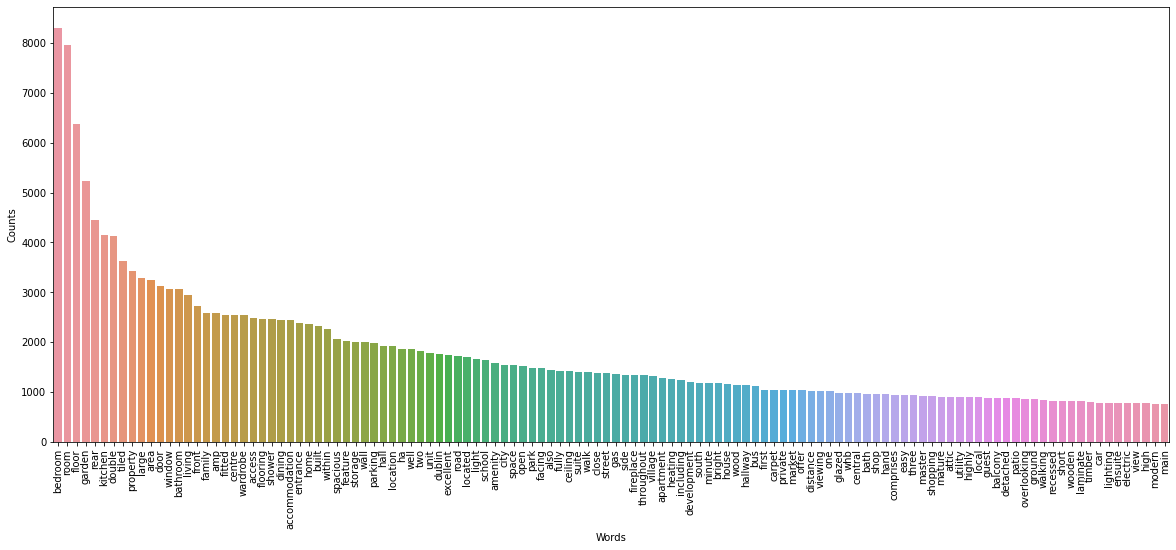

In [40]:
# Plot the list of words by word accurences acorss all the prperty records

plt.figure(figsize=(20, 8))
ax = sn.barplot(x='Words', y='Counts', data=df_wdcount, order=df_wdcount.sort_values('Counts', ascending=False).Words)
plt.xticks(rotation=90)

### Word Occurrence Plot
**Analysis** This plot of Word Occurrence in the corpus of text provides us with an view on recurring words in the description+feature text describing the properties. Recurring descriptive words are important as they are used by estate agents to differentiate properties and attract buyers. Many word are typically used by estate agents and they have a lexicon that they use for advertisements. 

However, the word occurrece, while important, does not tell the whole story. Recurring words may not differentiate properties in a large list of poperties. Very common words may not attract attention to buy or have an impact on price, which is what we are predicting here. To augment our analysis, we will also look at TF-IDF to dentify important words within the property descriptions.

## Term Frequency-Inverse Document Frequency (TF-IDF) in Property Corpus

In [41]:
df_train.columns

Index(['Index', 'Location', 'Num_Bathrooms', 'Num_Beds', 'BER_class',
       'Description', 'Features', 'Latitude', 'Longitude', 'Surface', 'Price',
       'Type_apartment', 'Type_bungalow', 'Type_detached', 'Type_duplex',
       'Type_end-of-terrace', 'Type_semi-detached', 'Type_site', 'Type_studio',
       'Type_terraced', 'Type_townhouse', 'Desc_Feat'],
      dtype='object')

In [42]:
# Test out TF-IDF on the corpus of Description+Features
# Preprocess the data first ... although for TF-IDF it would push common words down the list anyway, but for simplicity we remove them

corpus = []
n = df_train.shape[0]
for p in range(n):
  text = nlp_preprocess((df_train.iloc[p]['Desc_Feat']))
  corpus.append(" ".join(text))

In [43]:
# Apply TF-IDF to the corpus of text across all property records
# This approach will provide us with another list, but this time rather than just calculating common words
# we will calculate using TF-IDF hwo important words are to the corpus of documents

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

tfidfTransform = TfidfTransformer(use_idf=True)
CV = CountVectorizer()
word_count = CV.fit_transform(corpus)
tf_idf = tfidfTransform.fit_transform(word_count)
df = pd.DataFrame(tf_idf[0].T.todense(), index=CV.get_feature_names(), columns=['tfidf'])
df = df.sort_values('tfidf', ascending=False)
print(df.head(120))

                  tfidf
extensively    0.333659
chipping       0.312013
row            0.283394
bedroom        0.168313
apartment      0.159009
...                 ...
school         0.034877
home           0.034100
location       0.032385
accommodation  0.027935
peninsula      0.000000

[120 rows x 1 columns]


In [44]:
# Reset the index of the dataframe and rename the index to make it easier to plot.

df.reset_index(inplace=True)
df_150=df.loc[1:150] # select 150 words from the dataframe
df_150_words = df_150.rename(columns={"index":"words"})

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149]),
 <a list of 150 Text major ticklabel objects>)

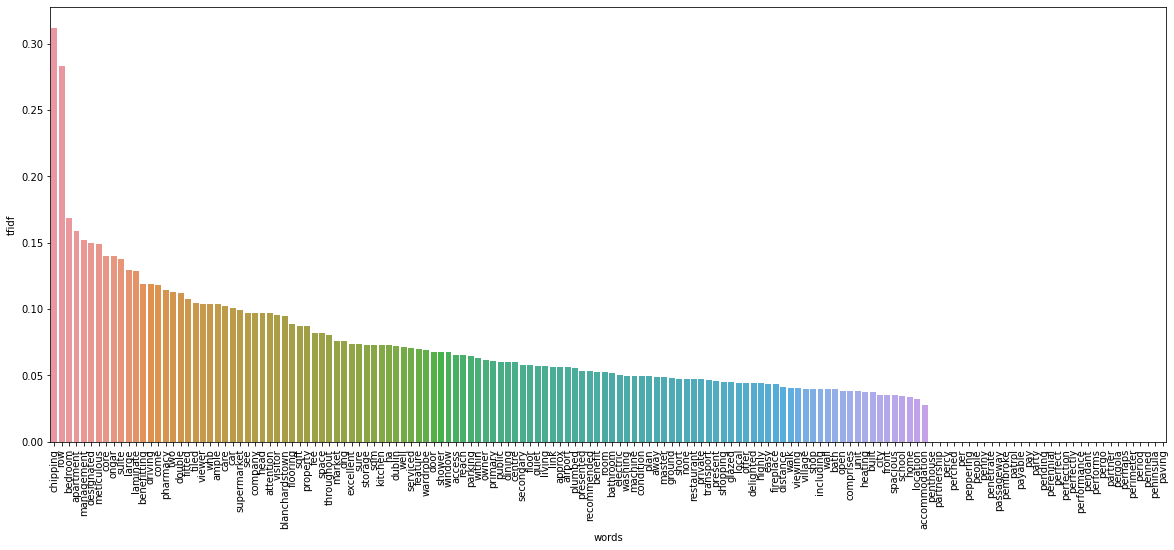

In [45]:
# Plot ordered list of words by TF-IDF score

plt.figure(figsize=(20, 8))
ax = sn.barplot(x='words', y='tfidf', data=df_150_words, order=df_150_words.sort_values('tfidf', ascending=False).words)
plt.xticks(rotation=90)

### Term Frequency - Inverse Document Frequency (TF-IDF) Plot
**Analysis** This plot differs from the pure word count plot above. It provides a visual of the words that are most important to the corpus of data. You can see the words order by *how important they are* with words that are very common, i.e. recur very frequenetly in the property descriptions, set to '0' - this can be seen by the suddent drop after the word "accomodation".

A good description of how TF-IDF works can be found in the text by Silge and Robinson (2021) or Chaudhary (2020).


In [ ]:
# Prints word position for analysis below

print (df_150_words[df_150_words['words'] == "amenity"])

print (df_wdcount[df_wdcount['Words'] == "amenity"])

Empty DataFrame
Columns: [words, tfidf]
Index: []
      Words  Counts
47  amenity    1577


### How do we create new features from this information?
With the Word Occurrence and TF-IDF information we can now apply an heuristic approach to determine the new features.
Neither plots provides us with all the information but given an understanding of what is important for prospective home buyers (or investors as the case may be), we can say:

1. Having a garden is an important feature of a house but not an apartment. The word 'garden' appears a lot (high on Word Occurrence and low (< 7000) on TF-IDF). Given this we can assume that 'garden' is not a maor differentiator in general but it is an important consideration to *generalise* our model

2. Parking appears quite high in both word occurrence and TF-IDF score. It is clearly important for both house and apartment buyers. We will include this as one of our features

3. School also appears on both plots: word occurrence (46) and TF-IDF (115). For families we know that this is important. Families live on both houses and apartments and it can be a deciding factor

4. Public Transport appears as "transport" in TF-IDF and as "bus" in word count. Based on knowledge that public transport is important in Dublin, we can take these values as important features.

5. Local Amenities appear in both lists of words as "amentity", "retaurant", "pharmacy", "supermarket. These are key both from the position on both plots and heuristic domain knowledge.

With these findings, we can now search the individual words in each property record looking for these words and setting [0] if it does not occur and [1] if it does for the following nw features:

1. has_Garden
2. has_Parking
3. local_School (close to schools to include "school", "secondary", "primary")
4. local_Transport (to include "transport", "bus")
5. local_Amenities (to include "amenity", "shop", "shopping", "restaurant", "supermarket")


### Create new features from above rules

In [46]:
# Reload the data to ensure we are working with clean datasets

path = '/content/sample_data/'

# Due to formatting issues, I found that explicitly defining features of interest and omitting ones that are problematic was useful

train_file = path+'HousePrice_Train.csv'
test_file = path+'HousePrice_Test.csv'

# Import the data, while excluding 'features' and 'description_block' explicitly on import
train_data = pd.read_csv(train_file)
test_data = pd.read_csv(test_file)

In [47]:
# Create new features in training and test dataframes
# Go back to original datasets: we will want to split them for performance testing on training and validation sets

df_train = train_data.join(pd.DataFrame(
    {
        'has_Garden': 0,
        'has_Parking': 0,
        'local_School': 0,
        'local_Transport': 0,
        'local_Amenities': 0
    }, index=train_data.index
))

In [48]:
# Combine 'Description' and 'Features'

df_train['Desc_Feat'] = df_train['Description'] + ' ' + df_train['Features']

In [49]:
# check if words are in a text

def words_in_text(list, text):
  return set(list).intersection(text)

In [50]:
# Process the text descriptions in the new 'Desc_Feat' column for each property

_Garden = ["garden"]
_Parking = ["parking"]
_localSchool = ["school", "primary school", "secondary school"]
_localTransport = ["transport", "bus"]
_localAmenities = ["amenity", "shop", "shopping", "restaurant", "supermarket", "pharmacy"]

for index, row in df_train.iterrows():
  descfeat = []
  text = nlp_preprocess((df_train.iloc[index]['Desc_Feat']))
  descfeat.append(" ".join(text))

  # check for key keywords to set the new features
  if words_in_text(_Garden, text): df_train.loc[index, "has_Garden"] = 1
  if words_in_text(_Parking, text): df_train.loc[index, "has_Parking"] = 1
  if words_in_text(_localSchool, text): df_train.loc[index, "local_School"] = 1
  if words_in_text(_localTransport, text): df_train.loc[index, "local_Transport"] = 1
  if words_in_text(_localAmenities, text): df_train.loc[index, "local_Amenities"] = 1

In [51]:
# Drop these columns from the datasets; they are no longer needed

df_train.drop(columns=['Description', 'Features', 'Desc_Feat'], inplace=True)

In [52]:
df_train.head()

,Index,ID,Location,Num_Bathrooms,Num_Beds,BER_class,Services,Latitude,Longitude,Type,Surface,Price,has_Garden,has_Parking,local_School,local_Transport,local_Amenities
0,1,12409116,Ongar,2,2,C3,NaN,53.396659,-6.438791,apartment,67.00,195000,0,1,1,1,1
1,2,12320330,North Strand,1,2,D1,NaN,53.357129,-6.239779,terraced,95.97,425000,1,0,1,0,1
2,3,12405953,Stepaside,3,3,A3,NaN,53.266468,-6.222771,semi-detached,107.00,535000,1,1,1,1,1
3,4,12202582,Cabinteely,1,3,E1,NaN,53.261600,-6.166738,detached,81.00,499000,1,1,1,1,1
4,5,12299336,Lusk,3,4,D1,NaN,53.550731,-6.121415,detached,153.00,510000,1,0,1,0,0


### Comments on New Features for datasets
Now we have added five new features to the property datasets. Before we take thenext step to train and test ML Models, I will quickly take a look to see if these features have impacted Feature Importance order.

### Pipeline Function
Firstly we create two pipeline functions to encapsulate the pre-processing steps before modelling.

In [178]:
# Create a processing pipeline as a function

def drop_outliers(dataset):

  # Remove outliers for location that is not in Dublin
  df_dataset = dataset.drop(dataset[(dataset.Longitude > -6) | (dataset.Latitude < 53)].index)

  # Remove Surface values over 2000.
  df_dataset = df_dataset.drop(df_dataset[df_dataset.Surface > 2000].index)

  return df_dataset

def process_dataset(dataset, exclude="None"):

  # Drop unimportant features
  dataset.drop(['ID', 'Index', 'Services'], axis=1, inplace=True)

  df_dataset = dataset.copy()

  # Replace Locations with index value from 'unique_areas_index' lookup
  df_dataset_1 = df_dataset.replace({'Location': unique_areas_index})

  # Replace BER_class with index value from 'unique_ber_index'
  df_dataset_2 = df_dataset_1.replace({'BER_class': unique_ber_index})

  # One-hot-encode 'Type
  if exclude == "None": 
    df_dataset_2 = pd.get_dummies(df_dataset_2, columns=['Type'])
  else: df_dataset_2.drop(columns=['Type'], inplace=True)

  df_dataset = df_dataset_2.copy()

  # Take a copy of the Location and BER_class before applying further scaling

  loc_ber_dataset_values = df_dataset[['Location', 'BER_class']].copy()

  # Apply scalers to features
  # Not a normal distribution so just scale with MinMax [0, 1]

  minmax=MinMaxScaler()
  standardscaler = StandardScaler()

  df_dataset[['Location']] = minmax.fit_transform(df_dataset[['Location']])

  # Deal with outliers with a Log Transform - later we will use Standard Scaler as well on some feature
  df_dataset['Num_Bathrooms'] = np.log(df_dataset['Num_Bathrooms'].apply(pd.to_numeric))
  df_dataset['Num_Beds'] = np.log(df_dataset['Num_Beds'].apply(pd.to_numeric))
  df_dataset['Latitude'] = np.log(df_dataset['Latitude'].apply(pd.to_numeric))
  df_dataset['Surface'] = np.log(df_dataset['Surface'].apply(pd.to_numeric))

  # Standard scaler for normal distributions
  df_dataset[['BER_class', 'Longitude', 'Latitude', 'Surface']] = standardscaler.fit_transform(df_dataset[['BER_class', 'Longitude', 'Latitude', 'Surface']])

  # Impute BER_class
  ber_values = impute_ber(loc_ber_dataset_values)

  # There are still a very small number (2 in both training and test datsets) of NaNs due to single properties in locations that have NaNs and therefore could not be averaged
  # We will apply an average over the entire feature for BER_class to populate these
  ber_values['BER_class'].fillna((ber_values['BER_class'].mean()), inplace=True)

  # We can apply the standard scaler to each of the training and test set BER_class features
  ber_values[['BER_class']] = standardscaler.fit_transform(ber_values[['BER_class']])

  # Then we insert these columns back into the df_train and df_test datasets
  df_dataset['BER_class'] = ber_values['BER_class']

  return df_dataset

In [148]:
# Create a New Features pipeline as a function

def new_features(data):

  df_data = data.join(pd.DataFrame(
    {
        'has_Garden': 0,
        'has_Parking': 0,
        'local_School': 0,
        'local_Transport': 0,
        'local_Amenities': 0
    }, index=data.index
  ))

  # Combine 'Description' and 'Features'
  df_data['Desc_Feat'] = df_data['Description'] + ' ' + df_data['Features']

  # Process the text descriptions in the new 'Desc_Feat' column for each property
  _Garden = ["garden"]
  _Parking = ["parking"]
  _localSchool = ["school", "primary school", "secondary school"]
  _localTransport = ["transport", "bus"]
  _localAmenities = ["amenity", "shop", "shopping", "restaurant", "supermarket", "pharmacy"]

  for idx, row in df_data.iterrows():
    descfeat = []
    text = nlp_preprocess((df_data.iloc[idx]['Desc_Feat']))
    descfeat.append(" ".join(text))

    # check for key keywords to set the new features
    if words_in_text(_Garden, text): df_data.loc[idx, "has_Garden"] = 1
    if words_in_text(_Parking, text): df_data.loc[idx, "has_Parking"] = 1
    if words_in_text(_localSchool, text): df_data.loc[idx, "local_School"] = 1
    if words_in_text(_localTransport, text): df_data.loc[idx, "local_Transport"] = 1
    if words_in_text(_localAmenities, text): df_data.loc[idx, "local_Amenities"] = 1

  # Drop these columns from the dataset; they are no longer needed

  df_data.drop(columns=['Description', 'Features', 'Desc_Feat'], inplace=True)

  return df_data

In [55]:
# Function to calculate MAPE

def MAPE(y_pred, y):

  sum = 0
  n = len(y_pred)
  for i in range(n):
    sum = sum + abs(y_pred[i] - y[i])/y[i]
  mape = sum/n
  return mape

In [128]:
# Reload the data to ensure we are working with clean datsets

path = '/content/sample_data/'

# Due to formatting issues, I found that explicitly defining features of interest and omitting ones that are problematic was useful

train_file = path+'HousePrice_Train.csv'
test_file = path+'HousePrice_Test.csv'

# Import the data, while excluding 'features' and 'description_block' explicitly on import
train_data = pd.read_csv(train_file)
test_data = pd.read_csv(test_file)

In [97]:
df_tr = drop_outliers(train_data)

In [98]:
# Separate the training dataset into Training and Validation Sets
colnames = list(df_tr.columns)
X = df_tr.iloc[:,0:-1].values 
y = df_tr.iloc[:,-1].values.reshape(-1,1)  

In [116]:
# Split training data into training and validation sets

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, shuffle = False)

In [117]:
# Convert numpy arrays to dataframes before processing

X_df_tr = pd.DataFrame(X_train, columns=colnames[:-1])
X_df_vl = pd.DataFrame(X_val, columns=colnames[:-1])

In [118]:
# save features of the training dataset
features = ['Location', 'Num_Bathrooms', 'Num_Beds', 'BER_class', 'Latitude',
            'Longitude', 'Surface', 'has_Garden', 'has_Parking', 'local_School',
            'local_Transport', 'local_Amenities', 'Type_apartment', 'Type_bungalow',
            'Type_detached', 'Type_duplex', 'Type_end-of-terrace',
            'Type_semi-detached', 'Type_studio', 'Type_terraced', 'Type_townhouse']

In [119]:
# Execute preprocessing steps in two calls
# First for training data
X_tr_step_1 = new_features(X_df_tr)
X_trn_ = process_dataset(X_tr_step_1)
X_trn_ = X_trn_[features]
X_trn = X_trn_.values

# Next for validation data
X_vl_step_1 = new_features(X_df_vl)
X_valid_ = process_dataset(X_vl_step_1)
X_valid_ = X_valid_[features]
X_valid = X_valid_.values


In [122]:
# Scale 'Price' if the dataset if Training

ylog = np.log(y_train.astype('float'))
yscaler = standardscaler.fit(ylog)
y_trn =  yscaler.transform(ylog)

**Caution** the following may fail if all columns are not in both training and validation. I fixed this by shuffling instead of random_state for the train/test split. This is caused by the split data not having samples of all 'Types' and thus when one-hot-encoded this feature may be missing in either datset.

In [123]:
# Let's test for any performance changes with the XGBoost Model

# Call XGBoost Model for each dataset
model_processed_data, RMSE_xgb_train_processed, r2_xgb_train_processed = xgb_model(X_trn, y_trn, "Performance Evaluation for Full Training Set with New Features")

Performance Evaluation for Full Training Set with New Features
RMSE_score: 0.0145   R2_score: 0.9998


In [125]:
# Calculate MAPE scores for training and validation datsets

# Predictions and MAPE score for training data
# X_trn = X_trn_[features].values
y_pred_trn = model_processed_data.predict(X_trn)
y_pred_blr_trn = np.exp(yscaler.inverse_transform(y_pred_trn))
mape_trn = MAPE(y_pred_blr_trn, y_train)

# Predictions and MAPE score for validation data
y_pred_val = model_processed_data.predict(X_valid)
y_pred_blr_val = np.exp(yscaler.inverse_transform(y_pred_val))
mape_val = MAPE(y_pred_blr_val, y_val)

print("MAPE_training: %.4f   MAPE_validation: %.4f" %(mape_trn, mape_val))

MAPE_training: 0.0058   MAPE_validation: 0.1715


### Comment on model performance
The performance of the XGBoost on the data is very good. Performance of the model on the validation set (17.1%) with the addition NLP feature is 2% better than without. We will use this model to examine the Feature Importance, now with al features.

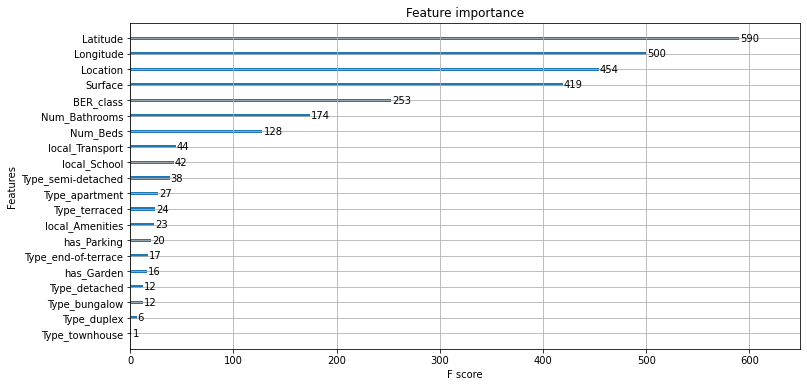

In [126]:
# Plot the Feature Importance to see what the impact of imputing BER_class has been
fig, ax = plt.subplots(figsize=(12, 6))

model_processed_data.get_booster().feature_names = features
xgb.plot_importance(model_processed_data, max_num_features= 21, ax=ax, importance_type="weight")
plt.show()

### **Analysis of new feature importance metrics**
From above plot it can be seen that the addition of the new features has impacted on the feature importance ranking. has_Parking, local_Transport and local_School are all more important that the 'Type' features. Most of the NLP features rank better than the 'Type' features also. These are interesting observations given that the features were embedded in text descriptions. The plot above has proven the value of NLP feature engineering, certainly in this case.

## Training, Validation & Test Data

In [280]:
# Reload the data to ensure we are working with clean datasets

path = '/content/sample_data/'

# Due to formatting issues, I found that explicitly defining features of interest and omitting ones that are problematic was useful

train_file = path+'HousePrice_Train.csv'
test_file = path+'HousePrice_Test.csv'

# Import the data, while excluding 'features' and 'description_block' explicitly on import
train_data = pd.read_csv(train_file)
test_data = pd.read_csv(test_file)

In [281]:
df_tr = drop_outliers(train_data)

In [282]:
# Separate the training dataset into Training and Validation Sets
colnames = list(df_tr.columns)
X = df_tr.iloc[:,0:-1].values 
y = df_tr.iloc[:,-1].values.reshape(-1,1)  

In [376]:
# Split training data into training and validation sets

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, shuffle = False)


In [285]:
# Convert numpy arrays to dataframes before processing

X_df_trn = pd.DataFrame(X_train, columns=colnames[:-1])
X_df_val = pd.DataFrame(X_val, columns=colnames[:-1])

In [286]:
# Execute preprocessing steps for each dataset
# First for training data
X_trn_step_1 = new_features(X_df_trn)
X_trn_ = process_dataset(X_trn_step_1, exclude="Type")
X_trn = X_trn_.values

# Next for validation data
X_val_step_1 = new_features(X_df_val)
X_val_ = process_dataset(X_val_step_1, exclude="Type")
X_val = X_val_.values

# Then for Test data
X_tst_step_1 = new_features(test_data)
X_tst_ = process_dataset(X_tst_step_1, exclude="Type")
X_tst = X_tst_.values


In [288]:
# Scale 'Price' if the dataset if Training

ylog = np.log(y_train.astype('float'))
yscaler = standardscaler.fit(ylog)
y_trn =  yscaler.transform(ylog)

### Train dataset

In [186]:
# show first data frame rows 
X_trn_.head(2)

,Location,Num_Bathrooms,Num_Beds,BER_class,Latitude,Longitude,Surface,has_Garden,has_Parking,local_School,local_Transport,local_Amenities
0,0.727891,0.693147,0.693147,-0.308404,0.620314,-2.004819,-0.803499,0,1,1,1,1
1,0.714286,0.000000,0.693147,0.030544,0.086969,0.194496,-0.109123,1,0,1,0,1


In [187]:
# Generate descriptive statistics
X_trn_.describe()

,Location,Num_Bathrooms,Num_Beds,BER_class,Latitude,Longitude,Surface,has_Garden,has_Parking,local_School,local_Transport,local_Amenities
count,1144.000000,1144.000000,1144.000000,1.144000e+03,1.144000e+03,1.144000e+03,1.144000e+03,1144.000000,1144.000000,1144.000000,1144.000000,1144.000000
mean,0.493899,0.573604,1.014252,2.393191e-16,7.657526e-14,-2.101903e-15,-7.955951e-16,0.763112,0.687937,0.616259,0.701049,0.904720
std,0.291405,0.501227,0.417951,1.000437e+00,1.000437e+00,1.000437e+00,1.000437e+00,0.425359,0.463538,0.486509,0.457999,0.293729
min,0.000000,0.000000,0.000000,-3.019988e+00,-1.828771e+00,-2.648097e+00,-3.279863e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.244898,0.000000,0.693147,-6.473522e-01,-7.794919e-01,-5.569837e-01,-6.216262e-01,1.000000,0.000000,0.000000,0.000000,1.000000
50%,0.455782,0.693147,1.098612,3.054387e-02,-1.193644e-01,8.847636e-02,-1.085192e-01,1.000000,1.000000,1.000000,1.000000,1.000000
75%,0.782313,1.098612,1.386294,7.084399e-01,4.148042e-01,7.141824e-01,5.214280e-01,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,2.708050,2.708050,2.064232e+00,3.768460e+00,2.239625e+00,4.763999e+00,1.000000,1.000000,1.000000,1.000000,1.000000


### Validation dataset

In [188]:
X_val_.head(2)

,Location,Num_Bathrooms,Num_Beds,BER_class,Latitude,Longitude,Surface,has_Garden,has_Parking,local_School,local_Transport,local_Amenities
0,0.383562,1.94591,1.945910,0.729833,0.133894,-0.174115,1.176450,0,0,0,1,1
1,0.554795,0.00000,0.693147,0.376455,-0.125558,-0.652997,-0.907761,1,1,0,1,1


In [190]:
X_val_.describe()

,Location,Num_Bathrooms,Num_Beds,BER_class,Latitude,Longitude,Surface,has_Garden,has_Parking,local_School,local_Transport,local_Amenities
count,491.000000,491.000000,491.000000,4.910000e+02,4.910000e+02,4.910000e+02,4.910000e+02,491.000000,491.000000,491.000000,491.000000,491.000000
mean,0.516349,0.610902,1.051803,2.469172e-16,-1.483172e-13,4.284421e-15,-9.542039e-17,0.780041,0.714868,0.629328,0.712831,0.885947
std,0.292266,0.525939,0.446404,1.001020e+00,1.001020e+00,1.001020e+00,1.001020e+00,0.414641,0.451938,0.483477,0.452903,0.318200
min,0.000000,0.000000,0.000000,-2.803943e+00,-1.729079e+00,-2.450815e+00,-6.001987e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.256849,0.000000,0.693147,-6.836774e-01,-7.300245e-01,-6.142714e-01,-6.747513e-01,1.000000,0.000000,0.000000,0.000000,1.000000
50%,0.472603,0.693147,1.098612,2.307772e-02,-1.535161e-01,1.407822e-01,-1.015180e-01,1.000000,1.000000,1.000000,1.000000,1.000000
75%,0.801370,1.098612,1.386294,7.298328e-01,4.368323e-01,6.589140e-01,5.747842e-01,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,2.890372,3.295837,2.143343e+00,3.622611e+00,2.097493e+00,4.612305e+00,1.000000,1.000000,1.000000,1.000000,1.000000


### Test dataset

In [195]:
# show first data frame rows 
X_tst_.head(2)

,Location,Num_Bathrooms,Num_Beds,BER_class,Latitude,Longitude,Surface,has_Garden,has_Parking,local_School,local_Transport,local_Amenities
0,0.655172,0.693147,0.693147,-0.616615,-0.462275,0.098546,-0.854973,0,1,0,1,1
1,0.448276,0.693147,1.609438,0.689377,0.546564,-0.322551,0.571829,1,1,1,1,1


In [196]:
# Generate descriptive statistics
X_tst_.describe()

,Location,Num_Bathrooms,Num_Beds,BER_class,Latitude,Longitude,Surface,has_Garden,has_Parking,local_School,local_Transport,local_Amenities
count,702.000000,702.000000,702.000000,7.020000e+02,7.020000e+02,7.020000e+02,7.020000e+02,702.000000,702.000000,702.000000,702.000000,702.000000
mean,0.507663,0.580580,1.013545,-3.722885e-16,5.027555e-14,6.153356e-15,1.031147e-16,0.742165,0.688034,0.594017,0.692308,0.914530
std,0.291095,0.498537,0.415753,1.000713e+00,1.000713e+00,1.000713e+00,1.000713e+00,0.437754,0.463626,0.491431,0.461868,0.279779
min,0.000000,0.000000,0.000000,-2.575603e+00,-1.846362e+00,-2.936280e+00,-2.143177e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.270690,0.000000,0.693147,-6.166147e-01,-7.474966e-01,-5.664116e-01,-6.430413e-01,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.462069,0.693147,1.098612,3.638120e-02,-1.251458e-01,5.039519e-02,-8.309184e-02,1.000000,1.000000,1.000000,1.000000,1.000000
75%,0.793103,1.098612,1.386294,6.893772e-01,4.245285e-01,7.443558e-01,5.047100e-01,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,2.197225,2.639057,1.995369e+00,3.607425e+00,2.133195e+00,8.059505e+00,1.000000,1.000000,1.000000,1.000000,1.000000


### Baseline Predictions on Test with a Known Model Performance 
Let's set a baseline prediction on test data from XGBoost so we can compare with Bayesian Regression and Bayesian Neural Network

In [200]:
# Call XGBoost Model for each dataset
model_processed_data, RMSE_xgb_processed, r2_xgb_processed = xgb_model(X_trn, y_trn, "Performance Evaluation for Full Training Set with New Features")

Performance Evaluation for Full Training Set with New Features
RMSE_score: 0.0124   R2_score: 0.9998


In [201]:
# Predict on test dataset
y_pred_tst = model_processed_data.predict(X_tst)
y_pred_blr_tst = np.exp(yscaler.inverse_transform(y_pred_tst))

In [351]:
# Record baseline prices
df_prices = test_data['Index']
df_prices_tst = pd.DataFrame(y_pred_blr_tst, columns=['Baseline_price'])
full_test_predictions = pd.concat([df_prices, df_prices_tst], axis=1)
full_test_predictions

,Index,Baseline_price
0,1639,4.150231e+05
1,1640,5.011805e+05
2,1641,6.149604e+05
3,1642,1.305630e+06
4,1643,4.293751e+05
...,...,...
697,2336,2.236142e+05
698,2337,4.069345e+05
699,2338,5.456849e+05
700,2339,6.364734e+05


**Comment** These are the baseline predictions from XGBoost with a MAPE of 17% - we expect these to be a good estimate to check other methods against.

# PIECEWISE REGRESSION

**Piecewise regression**, extract from [Wikipedia](https://en.wikipedia.org/wiki/Segmented_regression):

Segmented regression, also known as piecewise regression or broken-stick regression, is a method in regression analysis in which the independent variable is partitioned into intervals and a separate line segment is fit to each interval. 

* Segmented regression analysis can also be performed on 
multivariate data by partitioning the various independent variables. 
* Segmented regression is useful when the independent variables, clustered into different groups, exhibit different relationships between the variables in these regions. 

* The boundaries between the segments are breakpoints.

* Segmented linear regression is segmented regression whereby the relations in the intervals are obtained by linear regression. 

### Bayesian Model Price Prediction on dataset with all key features (excluding 'Type' as determined above in EDA Section

In [352]:
# model
with pm.Model() as model:
    #prior over the parameters of linear regression
    alpha = pm.Normal('alpha', mu=0, sigma=30)
    #we have one beta for each column of Xn
    beta = pm.Normal('beta', mu=0, sigma=30, shape=X_trn.shape[1])
    #prior over the variance of the noise
    sigma = pm.HalfCauchy('sigma_n', 5)
    #linear regression model in matrix form
    mu = alpha + pm.math.dot(beta, X_trn.T)
    #likelihood, be sure that observed is a 1d vector
    like = pm.Normal('like', mu=mu, sigma=sigma, observed=y_trn[:,0])

Finished [100%]: Average Loss = 944.24


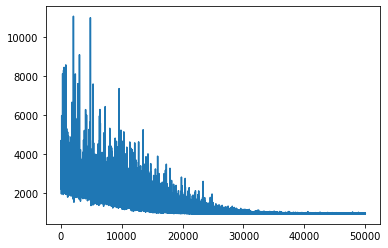

In [353]:
#number of iterations of the algorithms
iter = 50000

# run the model
with model:
    approximation = pm.fit(iter,method='advi')
    
# check the convergence
plt.plot(approximation.hist);

In [354]:
# samples from the posterior
posterior = approximation.sample(draws=702)

In [355]:
# prediction
ll=np.mean(posterior['alpha']) + np.dot(np.mean(posterior['beta'],axis=0), X_tst.T)
y_pred_BLR = np.exp(yscaler.inverse_transform(ll.reshape(-1,1)))[:,0]
print(len(y_pred_BLR))

702


In [356]:
df_prices = full_test_predictions
df_prices_bayes_full = pd.DataFrame(y_pred_BLR, columns=['Bayes_full_price'])
full_test_predictions = pd.concat([full_test_predictions, df_prices_bayes_full], axis=1)
full_test_predictions

,Index,Baseline_price,Bayes_full_price
0,1639,4.150231e+05,320351.105805
1,1640,5.011805e+05,497636.970569
2,1641,6.149604e+05,530244.216140
3,1642,1.305630e+06,765210.001873
4,1643,4.293751e+05,446298.836043
...,...,...,...
697,2336,2.236142e+05,202378.044964
698,2337,4.069345e+05,248919.578762
699,2338,5.456849e+05,504028.886184
700,2339,6.364734e+05,597527.008030


In [357]:
mape_bayes_full = MAPE(y_pred_blr_tst, y_pred_BLR)

print("MAPE_validation: %.4f   MAPE_bayes_full: %.4f" %(mape_val, mape_bayes_full))

MAPE_validation: 0.1715   MAPE_bayes_full: 0.1933


**Comments** MAPE_bayes_full is the MAPE score when comparing the baseline estimated prices on the test dataset with the estimated prices from the Bayesian Regression Model with all key features. This score of 19.3 % is a good performance if we are confident that the baseline estimates are good enough. Given the performance of the baseline estimation using XGBoost, it is reasonable to take this view.

### Price Prediction using Piecewise Bayesian Model (Clustering by Top 2 Key Features)

In [358]:
X_trn_.columns

Index(['Location', 'Num_Bathrooms', 'Num_Beds', 'BER_class', 'Latitude',
       'Longitude', 'Surface', 'has_Garden', 'has_Parking', 'local_School',
       'local_Transport', 'local_Amenities'],
      dtype='object')

**Comment** from the Feature Importance analysis above, the Longitude and Latitude features rank the highest. We will look at these features for the Piecewise approach.

In [359]:
# clustering by features 4, 5; from list above these are 'longitude' and 'latitude'
ind=[4, 5]
X_ind = np.vstack([X_trn[:,ind],X_tst[:,ind]])

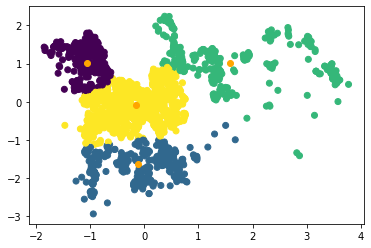

In [360]:
# training gaussian mixture model 
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=4)

# Gaussian Mixture
gmm.fit(X_ind)
# plot predicted clusters
label = gmm.predict(X_ind)
plt.scatter(X_ind[:,0],X_ind[:,1], c = label)
# centroids:  orange dots
plt.scatter(gmm.means_[:,0],gmm.means_[:,1], c = 'orange')

**Comment** reviewing 3, 4, 5 and 6 clusters, four clusters seems a reasonable choice.

#### Prediction on 4 Clusters

In [377]:
# Split training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, shuffle = False)

X_train = X_trn
X_test = X_tst

In [379]:
# train clusters

clusters_train = gmm.predict(X_train[:,ind])
unique_train, counts_train = np.unique(clusters_train, return_counts=True)
dict(zip(unique_train, counts_train))

{0: 174, 1: 193, 2: 186, 3: 591}

In [380]:
# test clusters

clusters_test = gmm.predict(X_test[:,ind])
unique_test, counts_test = np.unique(clusters_test, return_counts=True)
dict(zip(unique_test, counts_test))

{0: 114, 1: 114, 2: 111, 3: 363}

In [381]:
# Process data for cluster 0
Xn0 = X_train[clusters_train==0,:]
Xtestn0 = X_test[clusters_test==0,:]

ylog0 = np.log(y_train.astype('float')[clusters_train==0,:])
yscaler0 = StandardScaler().fit(ylog0)
yn0 = yscaler0.transform(ylog0)

In [382]:
# Process data for cluster 1
Xn1 = X_train[clusters_train==1,:]
Xtestn1 = X_test[clusters_test==1,:]

ylog1 = np.log(y_train.astype('float')[clusters_train==1,:])
yscaler1 = StandardScaler().fit(ylog1)
yn1 = yscaler1.transform(ylog1)

In [383]:
# Process data for cluster 2
Xn2 = X_train[clusters_train==2,:]
Xtestn2 = X_test[clusters_test==2,:]
ylog2 = np.log(y_train.astype('float')[clusters_train==2,:])
yscaler2 = StandardScaler().fit(ylog2)
yn2 = yscaler2.transform(ylog2)

In [384]:
# Process data for cluster 3
Xn3 = X_train[clusters_train==3,:]
Xtestn3 = X_test[clusters_test==3,:]
ylog3 = np.log(y_train.astype('float')[clusters_train==3,:])
yscaler3 = StandardScaler().fit(ylog3)
yn3 = yscaler3.transform(ylog3)

In [385]:
# Train model_0
with pm.Model() as model_0:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn0
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn0.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  #linear regression model in matrix form
  mu = alpha + pm.math.dot(beta, Xn0.T)
  # likelihood, be sure that observed is a 1d vector
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn0[:,0])

with model_0:
  # iterations of the algorithm
  approximation = pm.fit(40000,method='advi')

# samples from the posterior   
posterior0 = approximation.sample(114)

Finished [100%]: Average Loss = 214.39


In [386]:
# Train model_1
with pm.Model() as model_1:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn1.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  #linear regression model in matrix form
  mu = alpha + pm.math.dot(beta, Xn1.T)
  # likelihood, # 
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn1[:,0])
  
with model_1:
  # iterations of the algorithm
  approximation = pm.fit(40000,method='advi')

# samples from the posterior    
posterior1 = approximation.sample(114)

Finished [100%]: Average Loss = 209.22


In [387]:
# Train model_2
with pm.Model() as model_2:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn2.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  # linear regression model in matrix form
  mu = alpha + pm.math.dot(beta, Xn2.T)
  # likelihood, be sure that observed is a 1d vector
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn2[:,0])
    
with model_2:
  # iterations of the algorithms
  approximation = pm.fit(40000,method='advi')

# samples from the posterior    
posterior2 = approximation.sample(111)

Finished [100%]: Average Loss = 200.07


In [388]:
# Train model_3
with pm.Model() as model3:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn3.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  mu = alpha + pm.math.dot(beta, Xn3.T)#linear regression model in matrix form
  # likelihood, be sure that observed is a 1d vector
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn3[:,0])
    
with model3:
  # number of iterations of the algorithms
  approximation = pm.fit(40000,method='advi')

# samples from the posterior     
posterior3 = approximation.sample(363)

Finished [100%]: Average Loss = 505.56


In [389]:
# Posterior predictive checks (PPCs)
def ppc(alpha,beta,sigma, X,  nsamples=500):
    #we select nsamples random samples from the posterior
    ind = np.random.randint(0,beta.shape[0],size=nsamples)
    alphai = alpha[ind]
    betai = beta[ind,:]
    sigmai = sigma[ind]

    Ypred = np.zeros((nsamples,X.shape[0]))
    for i in range(X.shape[0]):
        #we generate data from linear model
        y_pred = alphai + np.dot(betai, X[i:i+1,:].T).T +np.random.randn(len(sigmai))*sigmai
        Ypred[:,i]=y_pred[0,:]
    return Ypred

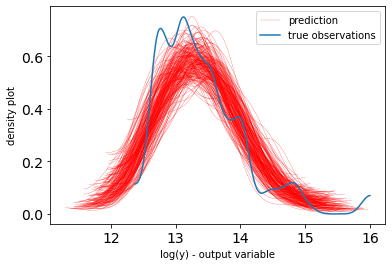

In [390]:
# Simulation for cluster 0
# Reverse the scaling for predicted value to get back to the original price scale
Ypred0 = yscaler0.inverse_transform(ppc(posterior0['alpha'],posterior0['beta'],posterior0['sigma_n'],Xn0,  nsamples=200))
for i in range(Ypred0.shape[0]):
    az.plot_dist( Ypred0[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred0[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
#plt.plot(np.linspace(-8,8,100),norm.pdf(np.linspace(-8,8,100),df=np.mean(posterior_1['nu'])))
#plt.xlim([0,10e7])
az.plot_dist(ylog0,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

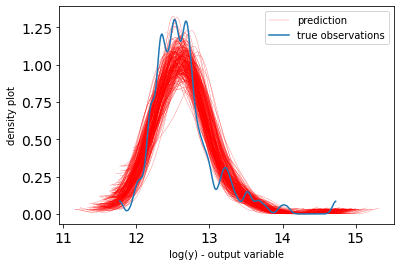

In [391]:
#Simulation for cluster 1
# Reverse the scaling for predicted value to get back to the original price scale
Ypred1 = yscaler1.inverse_transform(ppc(posterior1['alpha'],posterior1['beta'],posterior1['sigma_n'],Xn1,  nsamples=200))
for i in range(Ypred1.shape[0]):
    az.plot_dist( Ypred1[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred1[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
#plt.plot(np.linspace(-8,8,100),norm.pdf(np.linspace(-8,8,100),df=np.mean(posterior_1['nu'])))
#plt.xlim([0,10e7])
az.plot_dist(ylog1,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

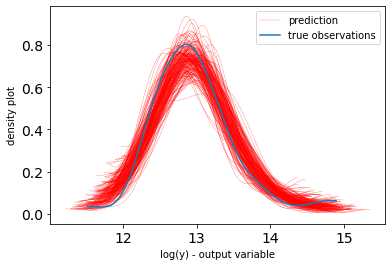

In [392]:
#Simulation
Ypred2 = yscaler2.inverse_transform(ppc(posterior2['alpha'],posterior2['beta'],posterior2['sigma_n'],Xn2,  nsamples=200))
for i in range(Ypred2.shape[0]):
    az.plot_dist( Ypred2[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred2[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
#plt.plot(np.linspace(-8,8,100),norm.pdf(np.linspace(-8,8,100),df=np.mean(posterior_1['nu'])))
#plt.xlim([0,10e7])
az.plot_dist(ylog2,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

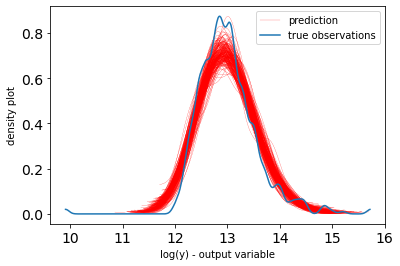

In [393]:
#Simulation for Cluster 3
# Reverse the scaling for predicted value to get back to the original price scale
Ypred3 = yscaler3.inverse_transform(ppc(posterior3['alpha'],posterior3['beta'],posterior3['sigma_n'],Xn3,  nsamples=200))
for i in range(Ypred3.shape[0]):
    az.plot_dist( Ypred3[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred3[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
#plt.plot(np.linspace(-8,8,100),norm.pdf(np.linspace(-8,8,100),df=np.mean(posterior_1['nu'])))
#plt.xlim([0,10e7])
az.plot_dist(ylog3,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

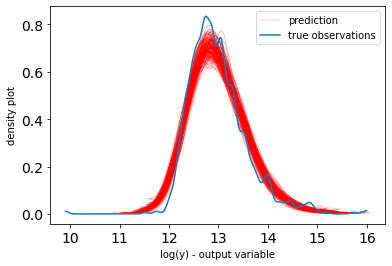

In [394]:
# Using PPC, take 200 samples from the posteriors of each cluster
Ypred0 = ppc(posterior0['alpha'],posterior0['beta'],posterior0['sigma_n'],Xn0,  nsamples=200)
Ypred1 = ppc(posterior1['alpha'],posterior1['beta'],posterior1['sigma_n'],Xn1,  nsamples=200)
Ypred2 = ppc(posterior2['alpha'],posterior2['beta'],posterior2['sigma_n'],Xn2,  nsamples=200)
Ypred3 = ppc(posterior3['alpha'],posterior3['beta'],posterior3['sigma_n'],Xn3,  nsamples=200)

# Create a combined predicted value by reversing the scaling done on each cluster prediction
Ypred = np.hstack([ yscaler0.inverse_transform(Ypred0),
                 yscaler1.inverse_transform(Ypred1),
                 yscaler2.inverse_transform(Ypred2),
                 yscaler3.inverse_transform(Ypred3)])

# Plot the distribution for the combined set of samples
for i in range(Ypred.shape[0]):
    az.plot_dist( Ypred[i,:],color='r',plot_kwargs={"linewidth": 0.2})

# plot the predicted distributions against the true distribution to see how they are close
az.plot_dist(Ypred[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
ylog=np.vstack([ylog0,ylog1,ylog2,ylog3])
az.plot_dist(ylog,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

In [395]:
# cluster 0
y_pred_BLR0 = np.exp(yscaler0.inverse_transform(np.mean(posterior0['alpha']) 
              + np.dot(np.mean(posterior0['beta'],axis=0), Xtestn0.T)))

# cluster 1
y_pred_BLR1 = np.exp(yscaler1.inverse_transform(np.mean(posterior1['alpha']) 
              + np.dot(np.mean(posterior1['beta'],axis=0), Xtestn1.T)))

# cluster 2
y_pred_BLR2 = np.exp(yscaler2.inverse_transform(np.mean(posterior2['alpha']) 
              + np.dot(np.mean(posterior2['beta'],axis=0), Xtestn2.T)))

# cluster 3
y_pred_BLR3 = np.exp(yscaler3.inverse_transform(np.mean(posterior3['alpha']) 
              + np.dot(np.mean(posterior3['beta'],axis=0), Xtestn3.T)))

joint_y_pred=np.hstack([y_pred_BLR0, y_pred_BLR1, y_pred_BLR2, y_pred_BLR3])

In [397]:
# Save predictions to predictions dataframe
df_1 = full_test_predictions
df_2 = pd.DataFrame(joint_y_pred, columns=['Price_Piecewise'])
full_test_predictions = pd.concat([df_1, df_2], axis=1)
full_test_predictions

,Index,Baseline_price,Bayes_full_price,Price_Piecewise
0,1639,4.150231e+05,320351.105805,4.381087e+05
1,1640,5.011805e+05,497636.970569,4.389233e+05
2,1641,6.149604e+05,530244.216140,5.941421e+05
3,1642,1.305630e+06,765210.001873,1.651132e+06
4,1643,4.293751e+05,446298.836043,2.318399e+05
...,...,...,...,...
697,2336,2.236142e+05,202378.044964,5.573878e+05
698,2337,4.069345e+05,248919.578762,2.680440e+05
699,2338,5.456849e+05,504028.886184,1.951517e+05
700,2339,6.364734e+05,597527.008030,2.638679e+05


In [398]:
mape_bayes_cluster = MAPE(y_pred_blr_tst, joint_y_pred)

print("MAPE_validation: %.4f   MAPE_bayes_cluster: %.4f" %(mape_val, mape_bayes_cluster))

MAPE_validation: 0.1715   MAPE_bayes_cluster: 0.7365


**Comments** MAPE_bayes_cluster is the MAPE score when comparing the baseline estimated prices on the test dataset with the estimated prices from the Bayesian Piecewise Regression Model with all key features. This score of 73 % is poor performance and is attributed to the use of only 2 featres, where the other key feature have a significant impact on performance. If the model was trained in clusters of all features, we would likely see a small improvement over just unclustered features.

# BAYESIAN NN

A [Bayesian network](https://en.wikipedia.org/wiki/Bayesian_network) (also known as a Bayes network, Bayes net, belief network, or decision network) is a probabilistic graphical model that represents a set of variables and their conditional dependencies via a directed acyclic graph (DAG). 

* Bayesian networks are ideal for taking an event that occurred and predicting the likelihood that any one of several possible known causes was the contributing factor. 
* For example, a Bayesian network could represent the probabilistic relationships between diseases and symptoms. 
* Given symptoms, the network can be used to compute the probabilities of the presence of various diseases.

Your comments, explanation, and references here.

In [317]:
# Instantiate Kernel
kernel = GPy.kern.RBF(input_dim=1,lengthscale=0.15,variance=0.2)
print(kernel)

  rbf.         |  value  |  constraints  |  priors
  variance     |    0.2  |      +ve      |        
  lengthscale  |   0.15  |      +ve      |        


In [399]:
X_train = X_trn
X_test = X_tst

In [400]:
# Scale 'Price' if the dataset if Training

ylog = np.log(y_train.astype('float'))
yscaler = standardscaler.fit(ylog)
y_train =  yscaler.transform(ylog)

In [401]:
# https://theano-pymc.readthedocs.io/en/latest/
import theano

# add a column of ones to include an intercept in the model
x1 = np.hstack([np.ones((X_train.shape[0],1)), X_train])
floatX = theano.config.floatX

In [402]:
l = 15
# Initialize random weights between each layer
# we do that to help the numerical algorithm that computes the posterior
init_1 = np.random.randn(x1.shape[1], l).astype(floatX)
init_out = np.random.randn(l).astype(floatX)

# pymc3 model as neural_network
with pm.Model() as neural_network:
    # we convert the data in theano type so we can do dot products with the correct type.
    ann_input = pm.Data('ann_input', x1)
    ann_output = pm.Data('ann_output', y_train)
    # Priors 
    # Weights from input to hidden layer
    weights_in_1 = pm.Normal('w_1', 0, sigma=1,
                             shape=(x1.shape[1], l), testval=init_1)
    # Weights from hidden layer to output
    weights_2_out = pm.Normal('w_0', 0, sigma=1,
                              shape=(l,),testval=init_out)

    # Build neural-network using tanh activation function
    # Inner layer
    act_1 = pm.math.tanh(pm.math.dot(ann_input,weights_in_1))
    # Linear layer, like in Linear regression
    act_out = pm.Deterministic('act_out',pm.math.dot(act_1, weights_2_out))

    # standard deviation of noise
    sigma = pm.HalfCauchy('sigma',5)

    # Normal likelihood
    out = pm.Normal('out',
                       act_out,
                       sigma=sigma,
                       observed=ann_output[:,0])

In [403]:
# we can do instead an approximated inference
param3 = 20000 # start with 1000, then use 50000+
VI = 'advi'  # 'advi', 'fullrank_advi', 'svgd', 'asvgd', 'nfvi'
OP = pm.adam # pm.adam, pm.sgd, pm.adagrad, pm.adagrad_window, pm.adadelta
LR = 0.01    

with neural_network:
    approx = pm.fit(param3, method=VI, obj_optimizer=pm.adam(learning_rate=LR))

Finished [100%]: Average Loss = 852.74


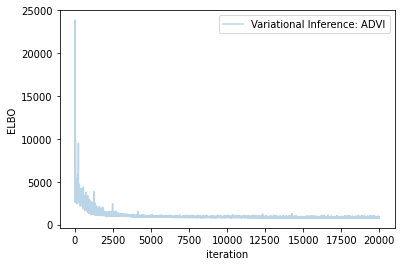

In [404]:
# plot 
pb.plot(approx.hist, label='Variational Inference: '+ VI.upper(), alpha=.3)
pb.legend(loc='upper right')
# Evidence Lower Bound (ELBO)
# https://en.wikipedia.org/wiki/Evidence_lower_bound
pb.ylabel('ELBO')
pb.xlabel('iteration');

In [405]:
# draw samples from variational posterior
D = 702
posterior = approx.sample(draws=D)

In [406]:
# add a column of ones to include an intercept in the model
x2 = np.hstack([np.ones((X_test.shape[0],1)), X_test])

y_pred = []
for i in range(posterior['w_1'].shape[0]):
    #inner layer
    t1 = np.tanh(np.dot(posterior['w_1'][i,:,:].T,x2.T))
    #outer layer
    y_pred.append(np.dot(posterior['w_0'][i,:],t1))

# predictions   
y_pred = np.array(y_pred)

In [407]:
# prediction
y_pred_BNN = np.exp(yscaler.inverse_transform(y_pred))[:,0]

# Let's check how close these are to the Full Mdel Predictions (Piecewise Approach)
df_1 = full_test_predictions.copy()
df_2 = pd.DataFrame(y_pred_BNN, columns=['Price_NN'])
full_test_predictions = pd.concat([df_1, df_2], axis=1)
full_test_predictions

,Index,Baseline_price,Bayes_full_price,Price_Piecewise,Price_NN
0,1639,4.150231e+05,320351.105805,4.381087e+05,396819.949686
1,1640,5.011805e+05,497636.970569,4.389233e+05,380039.226095
2,1641,6.149604e+05,530244.216140,5.941421e+05,397113.900456
3,1642,1.305630e+06,765210.001873,1.651132e+06,409911.987203
4,1643,4.293751e+05,446298.836043,2.318399e+05,401958.321818
...,...,...,...,...,...
697,2336,2.236142e+05,202378.044964,5.573878e+05,380332.163409
698,2337,4.069345e+05,248919.578762,2.680440e+05,417889.161735
699,2338,5.456849e+05,504028.886184,1.951517e+05,418055.864359
700,2339,6.364734e+05,597527.008030,2.638679e+05,389010.195567


In [409]:
mape_bnn = MAPE(y_pred_blr_tst, y_pred_BNN)

print("MAPE_validation: %.4f   MAPE_bayes_cluster: %.4f" %(mape_val, mape_bayes_cluster))

MAPE_validation: 0.1715   MAPE_bayes_cluster: 0.7365


In [ ]:
# Save this file as a CSV

full_test_predictions.to_csv(path+'ET5003_Kaggle_RobertBarrett_20157347.csv')

# SUMMARY

Your summary here.